In [101]:
import pandas as pd

from sklearn.cluster import KMeans 

In [102]:
data = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [120]:
# specify model features

feature_vars = [ 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'gear', 'carb','mpg']
id_var = "model"

X = data[feature_vars]
ID = data[id_var]

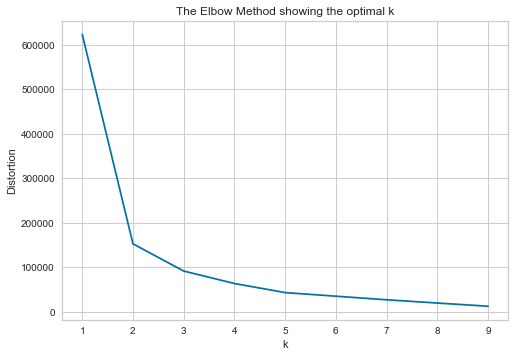

In [127]:
# generate elbow chart

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
    
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [128]:
# fit model with 2 clusters

model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [129]:
colors = {0:'red', 1:'blue'}

data_res = pd.concat([data,pd.DataFrame({"label":model.labels_})],axis=1)

data_res.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,label
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


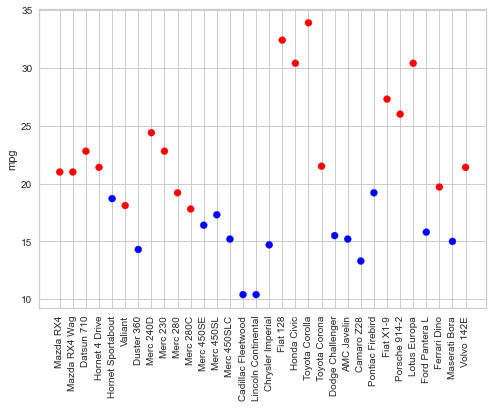

In [130]:
plt.scatter(x=ID,y=data_res.mpg,c=data_res.label.map(colors),)
plt.xticks(rotation=90)
plt.ylabel("mpg")
plt.show()

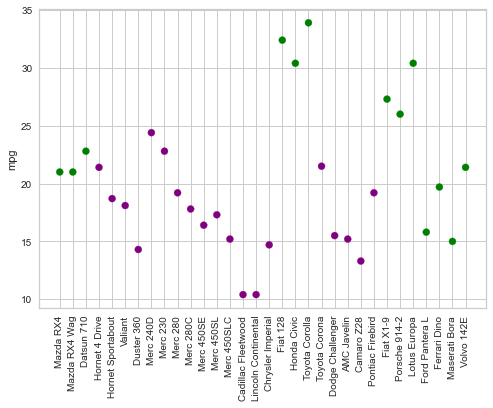

In [131]:
colors = {0:'purple', 1:'green'}


plt.scatter(x=ID,y=data_res.mpg,c=data_res.am.map(colors))
plt.xticks(rotation=90)
plt.ylabel("mpg")
plt.show()